In [3]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip available: 22.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Ratings
ratings = pd.read_csv(
    "../data/u.data",
    sep="\t",
    names=["user_id", "item_id", "rating", "timestamp"]
)

# Movies
movies = pd.read_csv(
    "../data/u.item",
    sep="|",
    encoding="latin-1",
    header=None,
    usecols=[0,1],
    names=["item_id", "title"]
)

# Merge ratings with movie titles
df = ratings.merge(movies, on="item_id")

df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


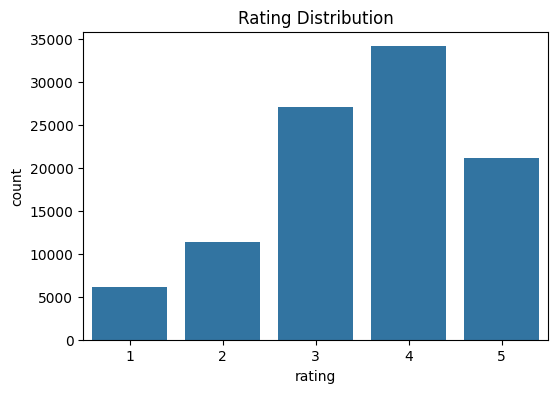

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x="rating", data=df)
plt.title("Rating Distribution")
plt.show()

In [6]:
top_movies = df.groupby("title")["rating"].count().sort_values(ascending=False).head(10)
top_movies

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [7]:
movie_stats = df.groupby("title").agg({
    "rating": ["mean", "count"]
})

movie_stats.columns = ["mean_rating", "rating_count"]

popular_movies = movie_stats[movie_stats["rating_count"] > 50]
popular_movies.sort_values("mean_rating", ascending=False).head(10)

,mean_rating,rating_count
title,,
"Close Shave, A (1995)",4.491071,112
Schindler's List (1993),4.466443,298
"Wrong Trousers, The (1993)",4.466102,118
Casablanca (1942),4.456790,243
Wallace & Gromit: The Best of Aardman Animation (1996),4.447761,67
"Shawshank Redemption, The (1994)",4.445230,283
Rear Window (1954),4.387560,209
"Usual Suspects, The (1995)",4.385768,267
Star Wars (1977),4.358491,583


In [8]:
user_movie_matrix = df.pivot_table(
    index="user_id",
    columns="title",
    values="rating"
)

user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [9]:
df.shape

(100000, 5)

In [10]:
df["user_id"].nunique()
df["title"].nunique()

1664

In [11]:
df["user_id"].nunique()

943

In [12]:
# Ratings
ratings = pd.read_csv(
    "../data/u.data",
    sep="\t",
    names=["user_id", "item_id", "rating", "timestamp"]
)

# Movies
movies = pd.read_csv(
    "../data/u.item",
    sep="|",
    encoding="latin-1",
    header=None,
    usecols=[0,1],
    names=["item_id", "title"]
)

df = ratings.merge(movies, on="item_id")

In [13]:
df["title"].nunique()

1664

In [14]:
movie_matrix = df.pivot_table(
    index="user_id",
    columns="title",
    values="rating"
)

movie_matrix.shape

(943, 1664)

In [15]:
star_wars_ratings = movie_matrix["Star Wars (1977)"]

similar_to_star_wars = movie_matrix.corrwith(star_wars_ratings)

corr_star_wars = pd.DataFrame(similar_to_star_wars, columns=["Correlation"])

corr_star_wars.dropna().sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
Star Wars (1977),1.0
Stripes (1981),1.0
Hollow Reed (1996),1.0
Man of the Year (1995),1.0
Cosi (1996),1.0
Commandments (1997),1.0
No Escape (1994),1.0
"Scarlet Letter, The (1926)",1.0
Safe Passage (1994),1.0


In [16]:
ratings_count = df.groupby("title")["rating"].count()

corr_star_wars = corr_star_wars.join(ratings_count)

corr_star_wars.columns = ["Correlation", "num_of_ratings"]

corr_star_wars[corr_star_wars["num_of_ratings"] > 100] \
    .sort_values("Correlation", ascending=False) \
    .head(10)

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [17]:
movie_matrix_filled = movie_matrix.fillna(0)

In [18]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')

model_knn.fit(movie_matrix_filled.T)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [19]:
import numpy as np

query_index = movie_matrix.columns.get_loc("Star Wars (1977)")

distances, indices = model_knn.kneighbors(
    movie_matrix_filled.T.iloc[query_index, :].values.reshape(1, -1),
    n_neighbors=6
)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print("Recommendations for Star Wars:\n")
    else:
        print(f"{movie_matrix.columns[indices.flatten()[i]]}, distance = {distances.flatten()[i]}")

Recommendations for Star Wars:

Return of the Jedi (1983), distance = 0.11552425339403638
Raiders of the Lost Ark (1981), distance = 0.23511487449631308
Empire Strikes Back, The (1980), distance = 0.25018075846311105
Toy Story (1995), distance = 0.26542794398902525
Godfather, The (1972), distance = 0.3026681571947406


In [20]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Ortalama rating ile tahmin yapalım (baseline)
mean_rating = train_data["rating"].mean()

test_data["prediction"] = mean_rating

rmse = np.sqrt(mean_squared_error(test_data["rating"], test_data["prediction"]))

print("RMSE:", rmse)

RMSE: 1.1238599168296066


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

user_matrix = movie_matrix_filled
user_similarity = cosine_similarity(user_matrix)

user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_matrix.index,
    columns=user_matrix.index
)

user_similarity_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.168937,0.048388,0.064561,0.379670,0.429682,0.443097,0.320079,0.078385,0.377733,...,0.372213,0.119860,0.269860,0.193343,0.197949,0.118722,0.315064,0.149086,0.181612,0.399432
2,0.168937,1.000000,0.113393,0.179694,0.073623,0.242106,0.108604,0.104257,0.162470,0.161273,...,0.147095,0.310661,0.363328,0.410725,0.322713,0.231096,0.228793,0.162911,0.175273,0.106732
3,0.048388,0.113393,1.000000,0.349781,0.021592,0.074018,0.067423,0.084419,0.062039,0.066217,...,0.033885,0.043453,0.167140,0.071288,0.126278,0.026758,0.164539,0.102899,0.136757,0.026990
4,0.064561,0.179694,0.349781,1.000000,0.031804,0.068431,0.091507,0.188060,0.101284,0.060859,...,0.054615,0.036784,0.133619,0.196561,0.146058,0.030202,0.196858,0.152041,0.171538,0.058752
5,0.379670,0.073623,0.021592,0.031804,1.000000,0.238636,0.374733,0.248930,0.056847,0.201427,...,0.340183,0.080580,0.095284,0.081053,0.148607,0.071612,0.239955,0.139595,0.153799,0.313941
